 1. Load + Visualize RGB Channels
 - Goal: Understand how OpenCV loads images (BGR by default), and split channels.

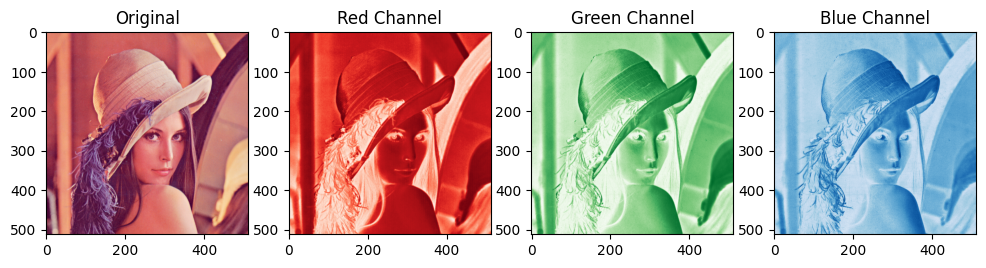

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/Lenna.png')
b, g, r =cv2.split(img)

# Convert to RGB for correct matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(img_rgb); plt.title('Original')
plt.subplot(1, 4, 2); plt.imshow(r, cmap='Reds'); plt.title('Red Channel')
plt.subplot(1, 4, 3); plt.imshow(g, cmap='Greens'); plt.title('Green Channel')
plt.subplot(1, 4, 4); plt.imshow(b, cmap='Blues'); plt.title('Blue Channel')
plt.show()

2. Convert to Grayscale, HSV, LAB
- Goal: Convert your image to other color spaces and explore how it looks.

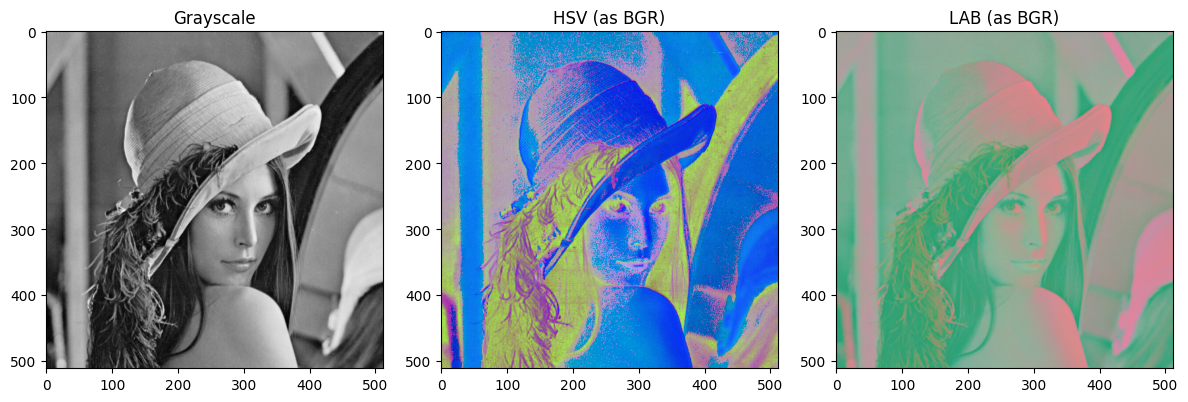

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(gray, cmap='gray'); plt.title('Grayscale')
plt.subplot(1, 3, 2); plt.imshow(hsv); plt.title('HSV (as BGR)')
plt.subplot(1, 3, 3); plt.imshow(lab); plt.title('LAB (as BGR)')
plt.tight_layout(); plt.show()

3. Visualize HSV Channels Separately
- Goal: Understand how Hue, Saturation, and Value affect perception.

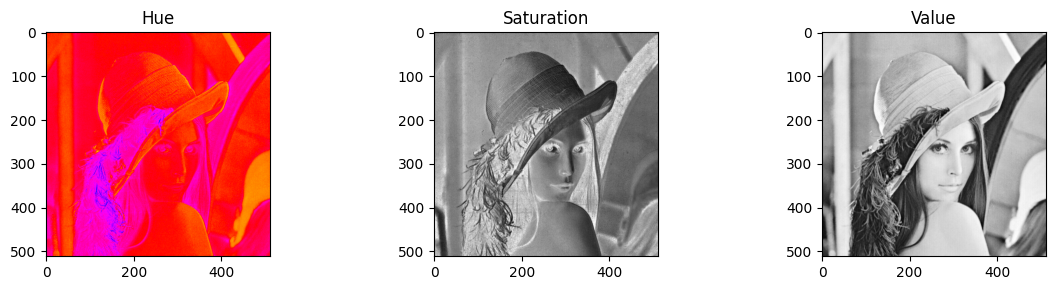

In [5]:
h, s, v = cv2.split(hsv)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.imshow(h, cmap='hsv'); plt.title('Hue')
plt.subplot(1, 3, 2); plt.imshow(s, cmap='gray'); plt.title('Saturation')
plt.subplot(1, 3, 3); plt.imshow(v, cmap='gray'); plt.title('Value')
plt.tight_layout(); plt.show()

4. Color-Based Masking
- Goal: Use HSV to isolate colors, e.g., red.

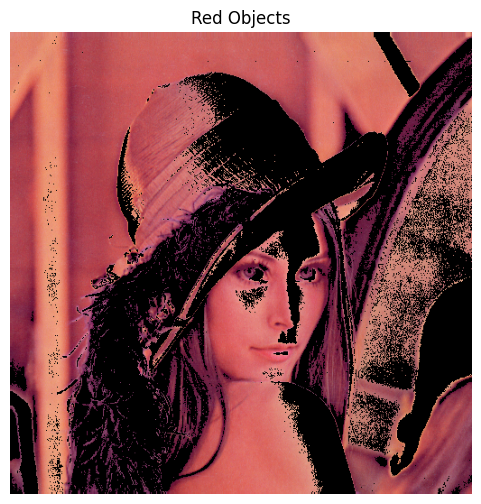

In [9]:
# Red has 2 HSV ranges due to hue wraparound
lower_red1 =(0, 100, 100)
upper_red1 = (10, 255, 255)
lower_red2 = (160, 100, 100)
upper_red2 = (180, 255, 255)

mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

result = cv2.bitwise_and(img, img,mask=mask)

# Convert result to RGB for correct display with matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(result_rgb)
plt.title("Red Objects")
plt.axis('off')
plt.show()

Example for LAB-Based Balancing

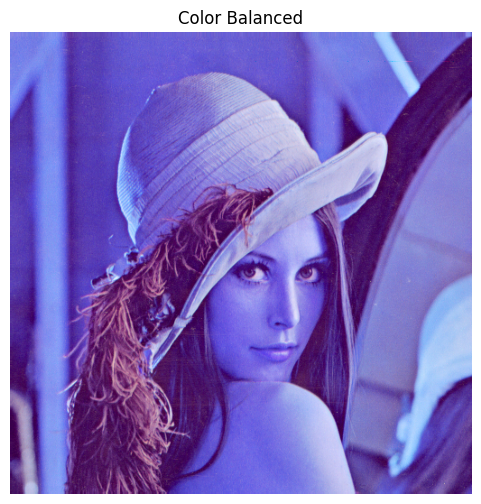

In [10]:
import cv2
import numpy as np

img = cv2.imread("images/Lenna.png")
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split channels
L, A, B = cv2.split(lab)

# Correct slight greenish tint by boosting A channel
A = cv2.add(A, 5)  # Add a small value to neutralize green

# Correct yellow tint by reducing B channel
B = cv2.subtract(B, 5)

# Merge and convert back
corrected_lab = cv2.merge([L, A, B])
balanced_img = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)

plt.figure(figsize=(6, 6))
plt.imshow(balanced_img)
plt.title("Color Balanced")
plt.axis('off')
plt.show()
